<a href="https://colab.research.google.com/github/rajatbutola/Initial-Practice-Learning/blob/master/Regression_GraduateDataPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
from google.colab import files
import io
import pandas as pd
data = files.upload()

Saving Admission_Predict.csv to Admission_Predict.csv


In [32]:
df = pd.read_csv(io.StringIO(data['Admission_Predict.csv'].decode('utf-8')))

In [33]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [34]:
df.shape

(400, 9)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [36]:
df.duplicated().sum()

0

In [47]:
df.drop(columns =['Serial No.'], inplace = True)

In [49]:
df.head(1)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92


In [50]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [52]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

In [58]:
 X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
93,301,97,2,3.0,3.0,7.88,1
23,334,119,5,5.0,4.5,9.70,1
299,305,112,3,3.0,3.5,8.65,0
13,307,109,3,4.0,3.0,8.00,1
90,318,106,2,4.0,4.0,7.92,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [102]:
model = Sequential()

model.add(Dense(7, activation = 'relu', input_dim = 7))
model.add(Dense(7, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))


In [103]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 7)                 56        
                                                                 
 dense_12 (Dense)            (None, 7)                 56        
                                                                 
 dense_13 (Dense)            (None, 1)                 8         
                                                                 
Total params: 120 (480.00 Byte)
Trainable params: 120 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [104]:
model.compile(loss='mean_squared_error', optimizer='Adam')

In [105]:
history=model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
8/8 [==============================] - 1s 25ms/step - loss: 0.4557 - val_loss: 0.4585
Epoch 2/100
8/8 [==============================] - 0s 8ms/step - loss: 0.4125 - val_loss: 0.4133
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 0.3623 - val_loss: 0.3558
Epoch 4/100
8/8 [==============================] - 0s 8ms/step - loss: 0.3002 - val_loss: 0.2833
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 0.2313 - val_loss: 0.2085
Epoch 6/100
8/8 [==============================] - 0s 8ms/step - loss: 0.1628 - val_loss: 0.1401
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 0.1034 - val_loss: 0.0831
Epoch 8/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0581 - val_loss: 0.0422
Epoch 9/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0291 - val_loss: 0.0194
Epoch 10/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0142 - val_loss: 0.0103
Epoch 11/100
8/8 [==========

In [106]:
y_pred = model.predict(X_test_scaled)

3/3 [==============================] - 0s 3ms/step


In [107]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7995370566315967

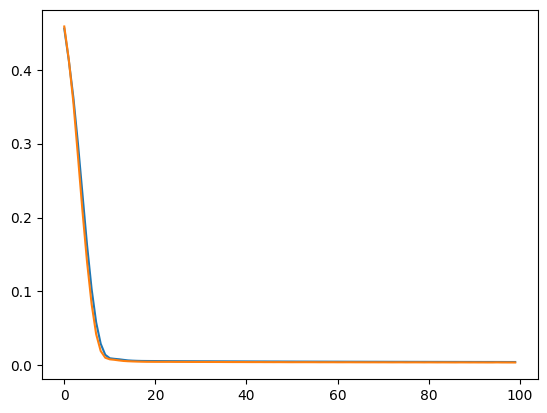

In [108]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])